![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [1]:
import pandas as pd
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()
df = df.drop(1827)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna()
df['size'] = pd.to_numeric(df['size'], errors='coerce')
df.info()
df = df.drop_duplicates(keep='first')
df = df.groupby(
    ['location', 'district', 'rooms', 'size', 'level', 'max_levels'], as_index=False
).agg({'price': 'mean'})
df['price'] = df['price'] / 1000
df['location'] = df['location'].str.strip()

<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7465 non-null   object 
 1   district    7465 non-null   object 
 2   rooms       7465 non-null   int64  
 3   size        7464 non-null   float64
 4   level       7465 non-null   int64  
 5   max_levels  7465 non-null   int64  
 6   price       7465 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 466.6+ KB


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [2]:
df = df[(df['size'] > 10) & (df['size'] <= 400)]
print(df.describe())
df[df['size']>300]
#For a big size the price was unusually high
df = df.drop([410,2064, 6246, 3259,3122, 2937,3115,2926, 3868,6153, 1827,2210,4265,3417,1273,1401,769,788,789,1655,1575,1434,1433,5238,5079, 5857])

             rooms         size        level   max_levels         price
count  6257.000000  6257.000000  6257.000000  6257.000000   6257.000000
mean      2.635129    73.810937     3.733578     6.096052     74.382014
std       1.067420    36.267485     2.278797     2.651644    699.233488
min       1.000000    11.000000     1.000000     1.000000      0.002000
25%       2.000000    51.000000     2.000000     4.000000     35.000000
50%       3.000000    67.000000     3.000000     5.000000     47.000000
75%       3.000000    87.000000     5.000000     9.000000     68.000000
max      10.000000   360.000000    19.000000    25.000000  52000.000000


In [3]:
df_chil = df[df['district']=='Чиланзарский']
df_chil= df_chil[df_chil['price']<=1000000]

In [4]:
df_chil = df_chil[df_chil['price']<500000]
df_chil[df_chil['price']>200000]
print(df_chil[df_chil['rooms'] == 2]['price'].mean())
df_chil[(df_chil['rooms']==1)&(df_chil['price']<15000)]

38.269099932249325


,location,district,rooms,size,level,max_levels,price
2904,"город Ташкент, Чиланзарский район",Чиланзарский,1,36.0,4,4,25.0
2905,"город Ташкент, Чиланзарский район",Чиланзарский,1,45.0,2,5,29.5
2918,"город Ташкент, Чиланзарский район, 1-й проезд ...",Чиланзарский,1,46.0,2,5,37.5
2920,"город Ташкент, Чиланзарский район, 1-й проезд ...",Чиланзарский,1,26.0,4,4,33.0
2923,"город Ташкент, Чиланзарский район, 1-й проезд ...",Чиланзарский,1,32.0,2,4,26.0
...,...,...,...,...,...,...,...
4154,"город Ташкент, Чиланзарский район, Чилонзор 1 ...",Чиланзарский,1,32.0,4,4,27.5
4194,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,1,43.0,4,9,35.0
4203,"город Ташкент, Чиланзарский район, проспект Бу...",Чиланзарский,1,20.0,5,5,18.5
4204,"город Ташкент, Чиланзарский район, проспект Бу...",Чиланзарский,1,29.0,3,4,30.0


<Axes: xlabel='size', ylabel='price'>

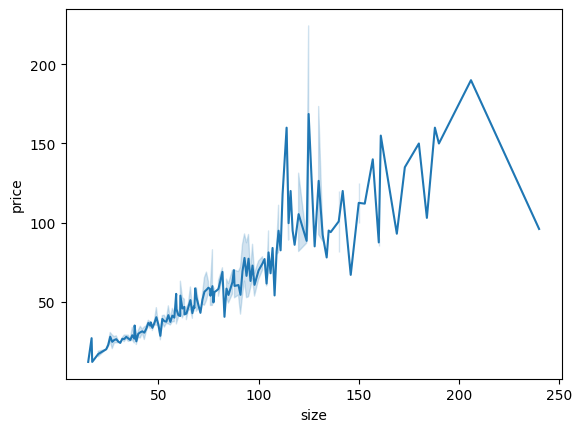

In [5]:
sns.lineplot(x='size', y='price', data=df_chil)

In [6]:
chil_noise = df_chil[(df_chil['size']>120)&(df_chil['size']<150)]
df_chil = df_chil[df_chil['price']<200]
#I will be removing these unusually high prices since Idk whether They are laxurious or have something special



<Axes: xlabel='size', ylabel='price'>

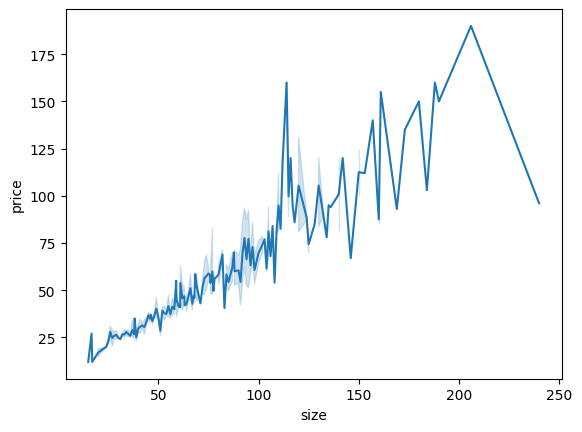

In [7]:
sns.lineplot(x='size', y='price', data=df_chil)

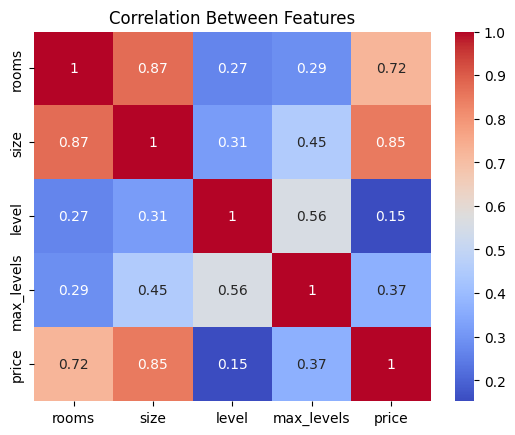

In [8]:
sns.heatmap(df_chil.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

<Axes: >

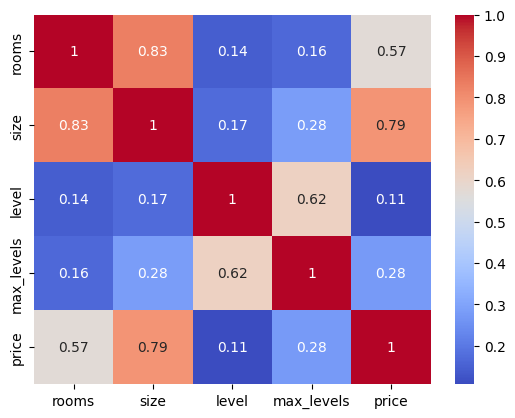

In [9]:
df['district'].value_counts()
df_mirzo = df[df['district']=='Мирзо-Улугбекский']
sns.heatmap(df_mirzo.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [10]:
df_mirzo = df_mirzo[df_mirzo['size']<10000]
#sns.lineplot(y='price', x='size', data= df_mirzo)
df_mirzo[df_mirzo['price']>100]



,location,district,rooms,size,level,max_levels,price
683,"город Ташкент, Мирзо-Улугбекский район, 1-й Па...",Мирзо-Улугбекский,7,192.0,8,9,155.000
701,"город Ташкент, Мирзо-Улугбекский район, 1-й пр...",Мирзо-Улугбекский,3,126.0,5,6,141.922
712,"город Ташкент, Мирзо-Улугбекский район, 2-й Па...",Мирзо-Улугбекский,4,160.0,8,8,160.000
725,"город Ташкент, Мирзо-Улугбекский район, 5-й пр...",Мирзо-Улугбекский,5,191.0,8,9,150.000
726,"город Ташкент, Мирзо-Улугбекский район, 7-й пр...",Мирзо-Улугбекский,3,115.0,2,9,115.000
...,...,...,...,...,...,...,...
1784,"город Ташкент, Мирзо-Улугбекский район, ц-1 Бу...",Мирзо-Улугбекский,4,90.0,3,4,133.000
1785,"город Ташкент, Мирзо-Улугбекский район, ц-1 Бу...",Мирзо-Улугбекский,4,92.0,4,4,130.000
1786,"город Ташкент, Мирзо-Улугбекский район, ц-1 Бу...",Мирзо-Улугбекский,4,100.0,9,9,107.500
1787,"город Ташкент, Мирзо-Улугбекский район, ц-1 Бу...",Мирзо-Улугбекский,4,130.0,3,4,195.000


In [11]:
#sns.lineplot(y='price', x='size', data= df_mirzo)
df_mirzo.loc[1432, 'price'] = (df_mirzo.loc[1432, 'price'] + df_mirzo.loc[1263, 'price']) / 2
df_mirzo.loc[724, 'price'] = (df_mirzo.loc[724, 'price'] + df_mirzo.loc[1766, 'price']) / 2

<Axes: xlabel='size', ylabel='price'>

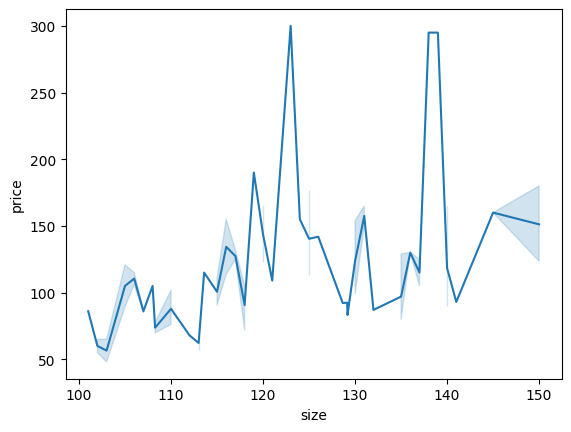

In [12]:
mirzo_noise = df_mirzo[(df_mirzo['size']>100)&(df_mirzo['size']<152)]
sns.lineplot(y='price', x='size', data= mirzo_noise)

In [13]:
for col in ['location', 'district', 'rooms', 'size']:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip().str.lower()


<Axes: xlabel='size', ylabel='price'>

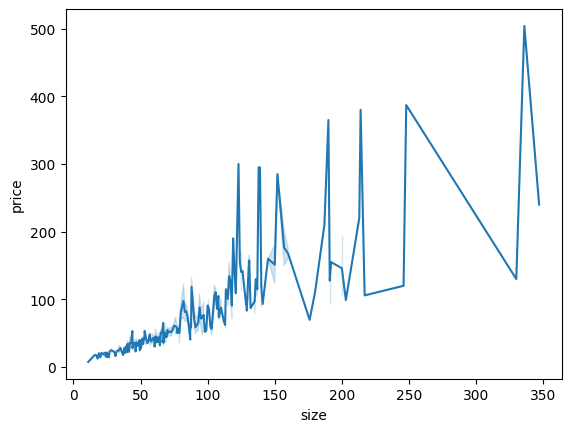

In [14]:
sns.lineplot(y='price', x='size', data= df_mirzo)

#юнусабадский


In [15]:
df = df.drop(df.index[5079])

<Axes: >

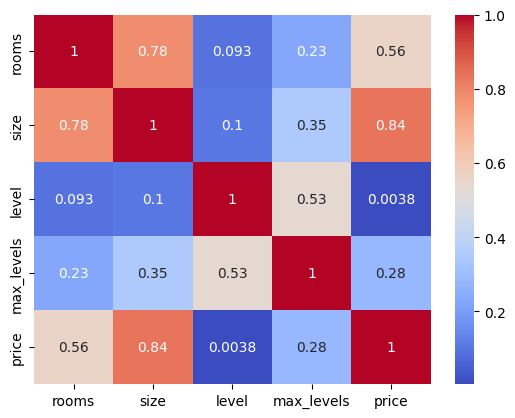

In [16]:
df_yun = df[df['district']=='юнусабадский']
sns.heatmap(df_yun.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='size', ylabel='price'>

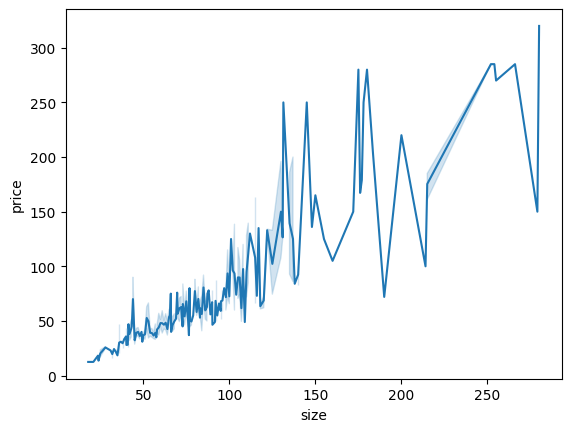

In [17]:
yun_noise = df_yun[(df_yun['size']>=132)&(df_yun['size']<138)]
#sns.lineplot(x='size', y='price', data=yun_noise)
sns.lineplot(x='size', y='price', data=df_yun)

#учтепинский




<Axes: >

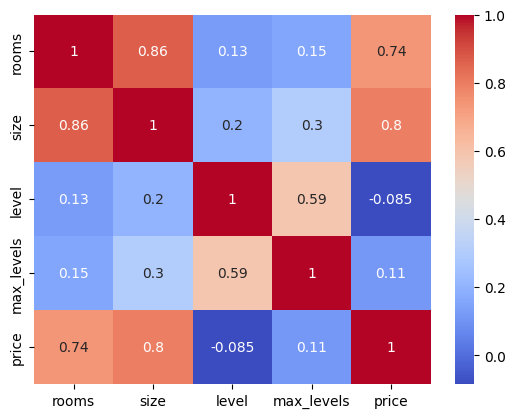

In [18]:
df_uchtepa = df[df['district']=='учтепинский']
sns.heatmap(df_uchtepa.corr(numeric_only=True), annot=True, cmap='coolwarm')

,location,district,rooms,size,level,max_levels,price
2188,"город ташкент, учтепинский район, 1-й проезд изза",учтепинский,4,98.0,5,9,60.7
2193,"город ташкент, учтепинский район, 1-й проезд к...",учтепинский,4,92.0,8,9,45.0
2194,"город ташкент, учтепинский район, 1-й проезд к...",учтепинский,4,96.0,1,4,75.0
2205,"город ташкент, учтепинский район, 4-й проезд т...",учтепинский,3,85.0,7,9,52.5
2207,"город ташкент, учтепинский район, 5-й проезд ю...",учтепинский,4,85.0,5,5,45.0
...,...,...,...,...,...,...,...
2826,"город ташкент, учтепинский район, чиланзар 31-...",учтепинский,4,98.0,1,9,85.0
2842,"город ташкент, учтепинский район, чиланзар ква...",учтепинский,2,84.0,3,7,68.0
2885,"город ташкент, учтепинский район, чиланзар-30 ...",учтепинский,4,95.0,2,5,62.0
2896,"город ташкент, учтепинский район, шарк",учтепинский,3,90.0,7,9,52.5


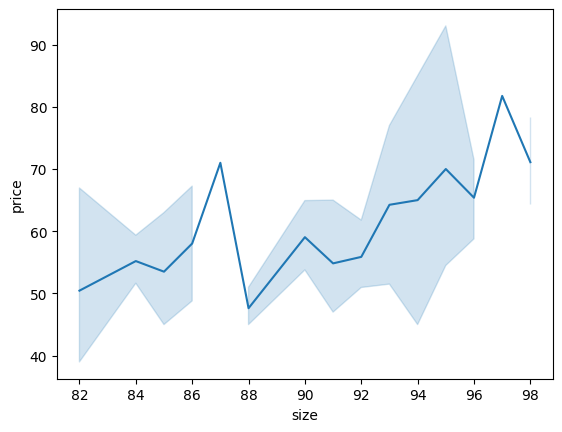

In [19]:
uchtepa_noise = df_uchtepa[(df_uchtepa['size']>80)&(df_uchtepa['size']<100)]
df_uchtepa.loc[2603, 'price'] = uchtepa_noise['price'].mean()
sns.lineplot(x='size', y='price', data=uchtepa_noise)
uchtepa_noise

<Axes: xlabel='size', ylabel='price'>

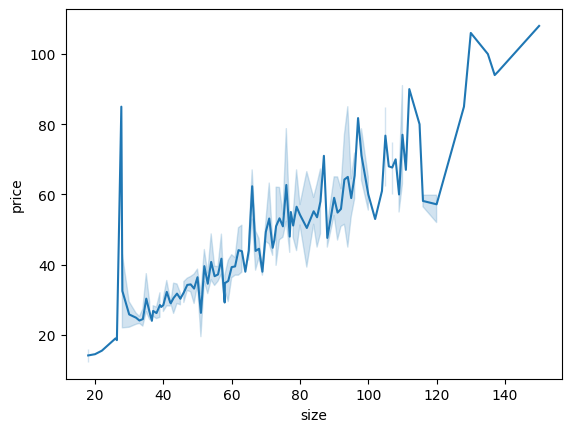

In [20]:
indexes = [2294,2395, 2396,]
df_uchtepa.loc[indexes, 'price'] = uchtepa_noise['price'].mean()
uchtepa_noise
sns.lineplot(x='size', y='price', data = df_uchtepa)


#мирабадский

<Axes: >

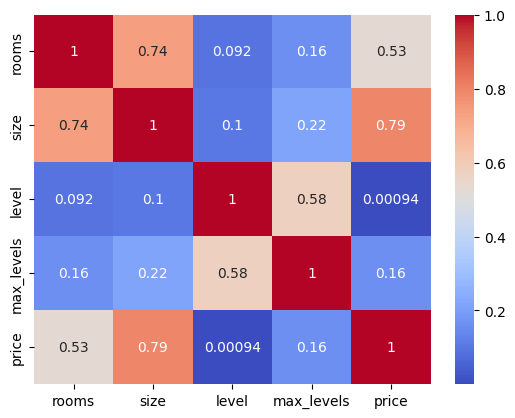

In [21]:
df_mirobod = df[df['district']=='мирабадский']
sns.heatmap(df_mirobod.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='size', ylabel='price'>

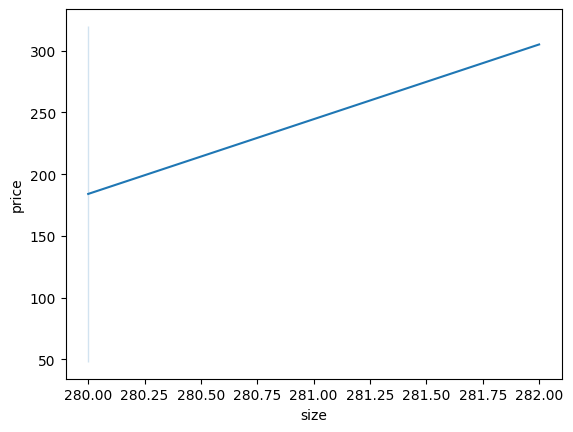

In [22]:
mirobod_noise = df_mirobod[(df_mirobod['size']>270)&(df_mirobod['size']<300)]
df_mirobod.loc[262, 'price'] = mirobod_noise['price'].mean()
sns.lineplot(x='size', y='price', data=mirobod_noise)

,location,district,rooms,size,level,max_levels,price
97,"город ташкент, мирабадский район, афросиаб",мирабадский,5,225.0,8,9,130.000
424,"город ташкент, мирабадский район, т шевченко",мирабадский,5,225.0,5,8,350.000
484,"город ташкент, мирабадский район, тараса шевченко",мирабадский,5,225.0,5,8,530.000
532,"город ташкент, мирабадский район, фаровон",мирабадский,5,225.0,1,5,215.000
592,"город ташкент, мирабадский район, цум (ц-7)",мирабадский,4,208.0,7,8,208.000
648,"город ташкент, мирабадский район, янгизамон",мирабадский,4,215.0,5,8,259.999


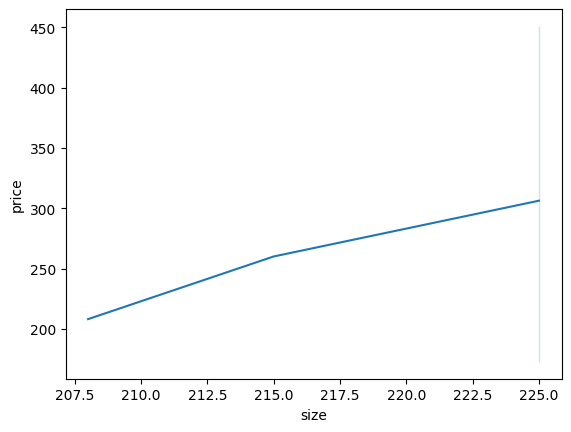

In [23]:
mirobod_noise = df_mirobod[(df_mirobod['size']>200)&(df_mirobod['size']<230)]
indexes = [97,484]
df_mirobod.loc[indexes, 'price'] = mirobod_noise['price'].mean()
sns.lineplot(x='size', y='price', data=mirobod_noise)
mirobod_noise

,location,district,rooms,size,level,max_levels,price
189,"город ташкент, мирабадский район, госпитальный",мирабадский,4,152.0,4,9,140.0
276,"город ташкент, мирабадский район, мирабад",мирабадский,4,150.0,3,8,54.0
309,"город ташкент, мирабадский район, нукусская (б...",мирабадский,4,150.0,3,12,140.0
506,"город ташкент, мирабадский район, ул. ойбека",мирабадский,4,150.0,6,9,145.0
510,"город ташкент, мирабадский район, ул.кунаева г...",мирабадский,4,152.0,2,8,380.0
530,"город ташкент, мирабадский район, фаровон",мирабадский,4,151.0,2,8,385.0


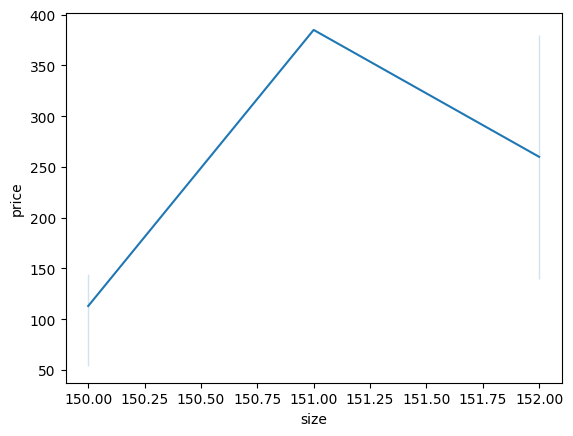

In [24]:
mirobod_noise = df_mirobod[(df_mirobod['size']>148)&(df_mirobod['size']<153)]
indexes = [276]
df_mirobod.loc[indexes, 'price'] = mirobod_noise['price'].mean()
sns.lineplot(x='size', y='price', data=mirobod_noise)
mirobod_noise

,location,district,rooms,size,level,max_levels,price
205,"город ташкент, мирабадский район, инокобод",мирабадский,4,125.0,2,4,65.000
271,"город ташкент, мирабадский район, мирабад",мирабадский,3,125.0,7,12,129.999
272,"город ташкент, мирабадский район, мирабад",мирабадский,3,127.0,7,12,135.000
392,"город ташкент, мирабадский район, северный вокзал",мирабадский,4,125.0,9,9,105.000
591,"город ташкент, мирабадский район, цум (ц-7)",мирабадский,3,125.0,4,9,130.000
609,"город ташкент, мирабадский район, чимкент",мирабадский,4,126.0,1,4,155.000
633,"город ташкент, мирабадский район, яккачинор",мирабадский,4,125.0,5,6,290.000
647,"город ташкент, мирабадский район, янгизамон",мирабадский,4,126.0,3,4,73.000


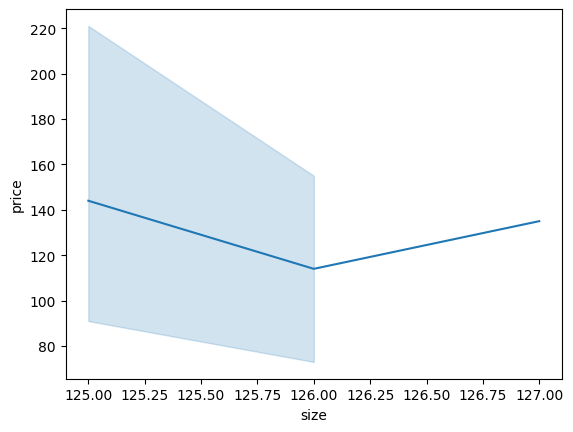

In [25]:
mirobod_noise = df_mirobod[(df_mirobod['size']>124)&(df_mirobod['size']<128)]
indexes = [647, 205]
df_mirobod.loc[indexes, 'price'] = mirobod_noise['price'].mean()
sns.lineplot(x='size', y='price', data=mirobod_noise)
mirobod_noise

,location,district,rooms,size,level,max_levels,price
51,"город ташкент, мирабадский район, абдулла авлоний",мирабадский,4,148.0,8,9,230.000000
141,"город ташкент, мирабадский район, гламур",мирабадский,4,145.0,5,9,120.000000
189,"город ташкент, мирабадский район, госпитальный",мирабадский,4,152.0,4,9,140.000000
190,"город ташкент, мирабадский район, госпитальный",мирабадский,4,155.0,2,12,130.000000
273,"город ташкент, мирабадский район, мирабад",мирабадский,3,157.0,8,9,105.000000
276,"город ташкент, мирабадский район, мирабад",мирабадский,4,150.0,3,8,207.333333
309,"город ташкент, мирабадский район, нукусская (б...",мирабадский,4,150.0,3,12,140.000000
355,"город ташкент, мирабадский район, нукус",мирабадский,4,147.0,3,12,134.250000
369,"город ташкент, мирабадский район, нукусская",мирабадский,4,147.0,3,12,132.000000
506,"город ташкент, мирабадский район, ул. ойбека",мирабадский,4,150.0,6,9,145.000000


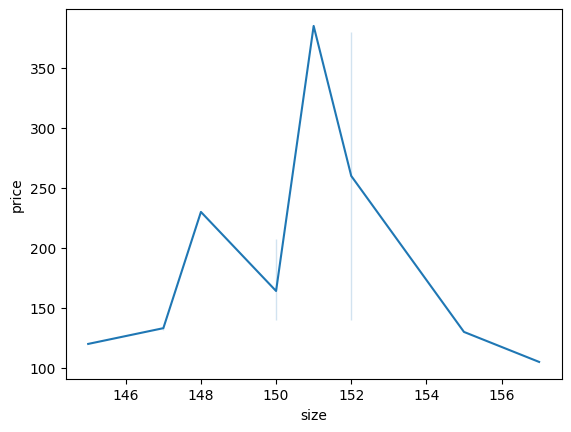

In [26]:
mirobod_noise = df_mirobod[(df_mirobod['size']>140)&(df_mirobod['size']<160)]
#indexes = [276]
#df_mirobod.loc[indexes, 'price'] = mirobod_noise['price'].mean()
sns.lineplot(x='size', y='price', data=mirobod_noise)
mirobod_noise

<Axes: xlabel='size', ylabel='price'>

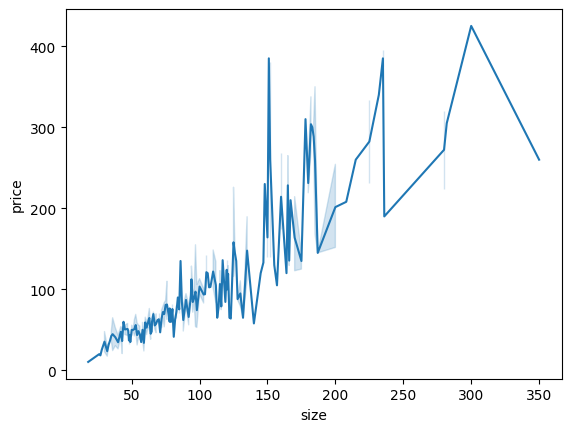

In [27]:
sns.lineplot(x='size', y='price', data=df_mirobod)

#яккасарайский

<Axes: >

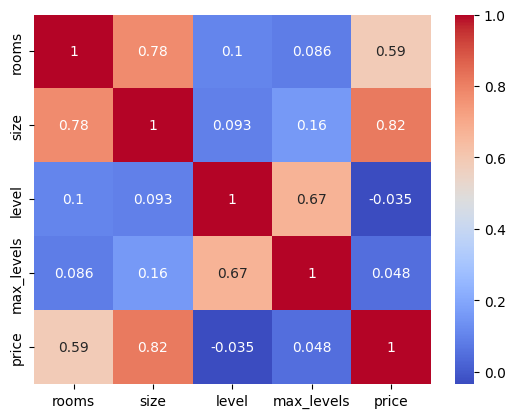

In [28]:
df_yakkasaray = df[df['district']=='яккасарайский']
sns.heatmap(df_yakkasaray.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [29]:
yakka_noise = df_yakkasaray[(df_yakkasaray['size']>62)&(df_yakkasaray['size']<66)]
df_yakkasaray.loc[5571, 'price'] = yakka_noise['price'].mean()

,location,district,rooms,size,level,max_levels,price
5431,"город ташкент, яккасарайский район, бабура",яккасарайский,4,110.0,3,10,73.000
5432,"город ташкент, яккасарайский район, бабура",яккасарайский,4,110.0,4,8,71.800
5468,"город ташкент, яккасарайский район, башлык",яккасарайский,4,110.0,7,9,75.000
5470,"город ташкент, яккасарайский район, башлык",яккасарайский,5,112.0,8,9,60.000
5504,"город ташкент, яккасарайский район, дамарик",яккасарайский,3,110.0,4,6,295.000
5540,"город ташкент, яккасарайский район, конституция",яккасарайский,4,110.0,5,8,120.000
5599,"город ташкент, яккасарайский район, махмуда та...",яккасарайский,3,110.0,3,6,285.000
5607,"город ташкент, яккасарайский район, мирабад",яккасарайский,4,110.0,1,4,154.998
5708,"город ташкент, яккасарайский район, урикзор",яккасарайский,3,110.0,9,9,78.000
5786,"город ташкент, яккасарайский район, юнуса раджаби",яккасарайский,4,112.0,4,5,146.500


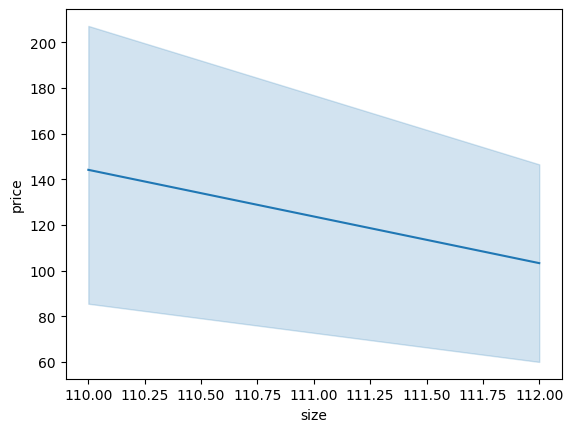

In [30]:
yakka_noise = df_yakkasaray[(df_yakkasaray['size']>109)&(df_yakkasaray['size']<113)]
indexes = [5504,5540,5599, 5786, 5607]
df_yakkasaray.loc[indexes, 'price'] = mirobod_noise['price'].mean()
sns.lineplot(x='size', y='price', data=yakka_noise)
yakka_noise

<Axes: xlabel='size', ylabel='price'>

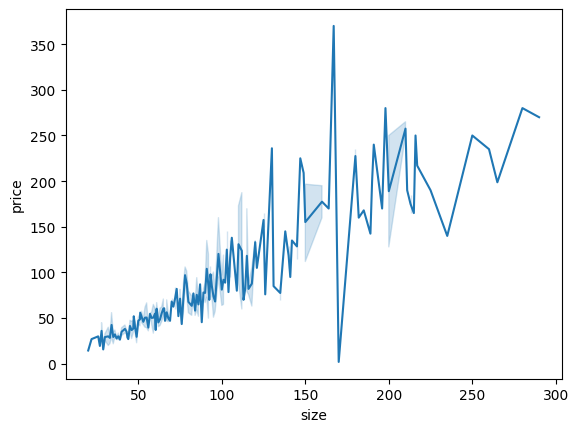

In [31]:
sns.lineplot(x='size', y='price', data=df_yakkasaray)


#яшнободский
> Add blockquote



<Axes: >

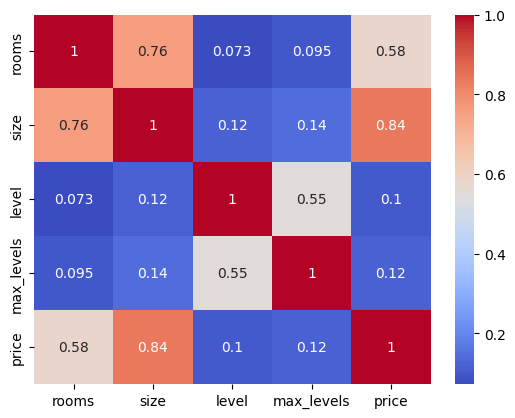

In [32]:
df_yashnaobod = df[df['district']=='яшнободский']
sns.heatmap(df_yashnaobod.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='size', ylabel='price'>

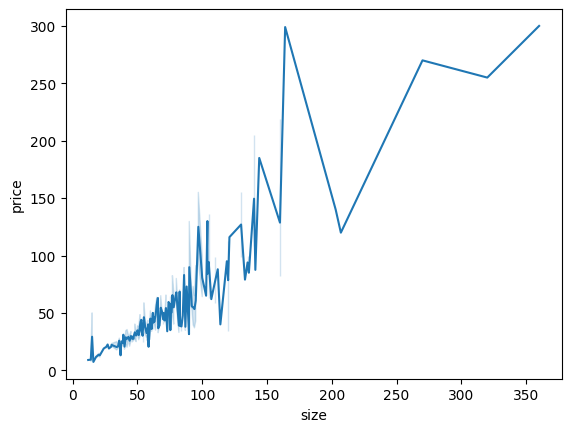

In [33]:
sns.lineplot(x='size', y='price', data=df_yashnaobod)

,location,district,rooms,size,level,max_levels,price
5869,"город ташкент, яшнободский район, 1-й проезд а...",яшнободский,3,67.0,4,4,39.00
5900,"город ташкент, яшнободский район, 58-й городок",яшнободский,3,69.0,5,5,50.00
6001,"город ташкент, яшнободский район, гузал махалл...",яшнободский,3,68.0,1,5,44.00
6018,"город ташкент, яшнободский район, истикбол",яшнободский,3,68.0,2,4,65.00
6024,"город ташкент, яшнободский район, карасу 5",яшнободский,3,67.0,4,4,39.00
6026,"город ташкент, яшнободский район, корасу 5",яшнободский,3,67.0,4,4,39.00
6247,"город ташкент, яшнободский район, янги давр",яшнободский,3,69.8,2,7,45.37
6272,"город ташкент, яшнободский район, жилой компле...",яшнободский,3,69.0,5,5,52.00


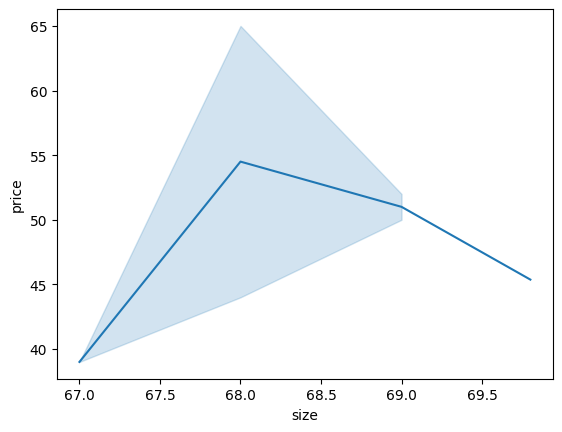

In [34]:
yashnaobod_noise = df_yashnaobod[(df_yashnaobod['size']>66)&(df_yashnaobod['size']<70)]
sns.lineplot(x='size', y='price', data=yashnaobod_noise)
yashnaobod_noise

#шайхантахурский

<Axes: >

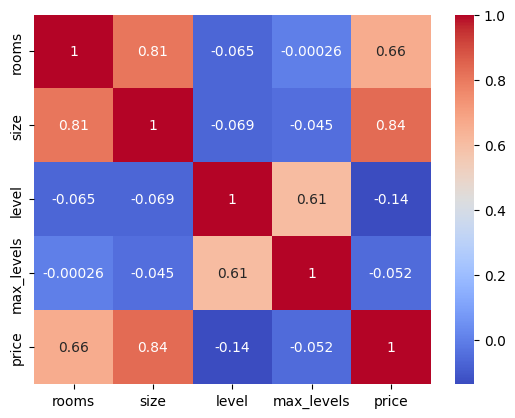

In [35]:
df_shayx = df[df['district']=='шайхантахурский']
sns.heatmap(df_shayx.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='size', ylabel='price'>

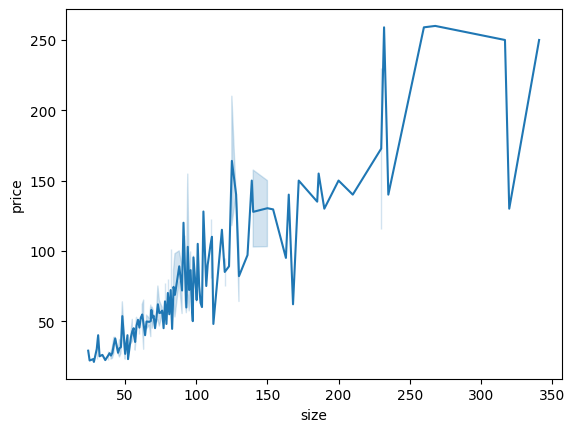

In [36]:
sns.lineplot(x='size', y='price', data=df_shayx)

,location,district,rooms,size,level,max_levels,price
4295,"город ташкент, шайхантахурский район, бирлик",шайхантахурский,7,230.0,2,5,230.0000
4346,"город ташкент, шайхантахурский район, жангох",шайхантахурский,5,210.0,2,4,140.0000
4347,"город ташкент, шайхантахурский район, жангох",шайхантахурский,5,232.0,7,8,259.0005
4397,"город ташкент, шайхантахурский район, караташ",шайхантахурский,7,230.0,2,5,115.5000
4506,"город ташкент, шайхантахурский район, хувайдо",шайхантахурский,5,235.0,1,2,140.0000


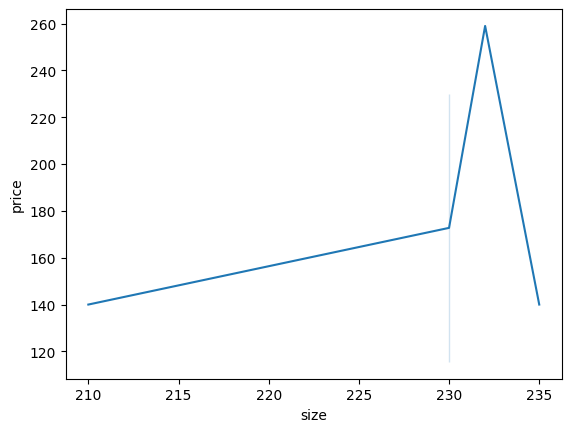

In [37]:
shayx_noise = df_shayx[(df_shayx['size']>200)&(df_shayx['size']<240)]
sns.lineplot(x='size', y='price', data=shayx_noise)
shayx_noise

<Axes: >

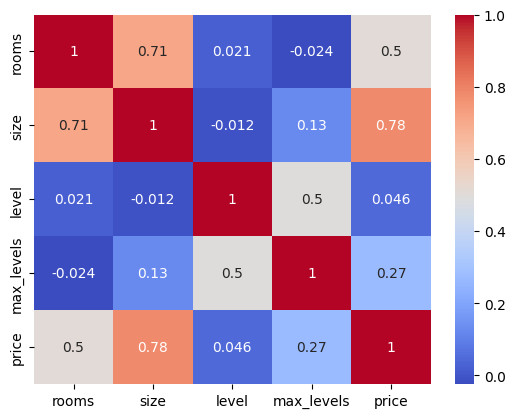

In [38]:
df_olmazor = df[df['district']=='олмазорский']
sns.heatmap(df_olmazor.corr(numeric_only=True), annot=True, cmap='coolwarm')

,location,district,rooms,size,level,max_levels,price
1860,"город ташкент, олмазорский район, камарнисо",олмазорский,6,200.0,3,4,65.0
1946,"город ташкент, олмазорский район, медгородок",олмазорский,3,205.8,1,6,95.0
2023,"город ташкент, олмазорский район, шифокорлар ш...",олмазорский,5,200.0,1,9,102.0
2035,"город ташкент, олмазорский район, ул беруни",олмазорский,4,200.0,3,4,250.0


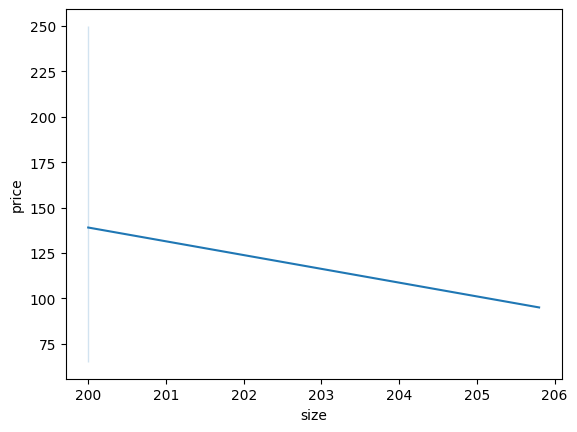

In [39]:
olmazor_noise = df_olmazor[(df_olmazor['size']>195)&(df_olmazor['size']<210)]
indexes = [1860, 2035]
df_olmazor.loc[indexes, 'price'] = olmazor_noise['price'].mean()
sns.lineplot(x='size', y='price', data=olmazor_noise)
olmazor_noise

<Axes: xlabel='size', ylabel='price'>

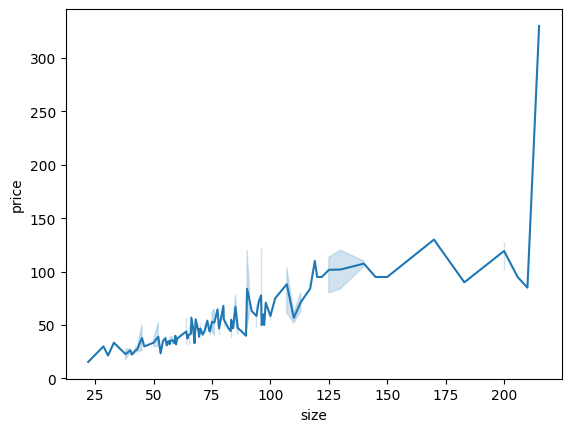

In [40]:
sns.lineplot(x='size', y='price', data=df_olmazor)

In [41]:
df['district'].value_counts()

,count
district,
чиланзарский,1307
мирзо-улугбекский,1111
юнусабадский,755
учтепинский,717
мирабадский,657
яккасарайский,522
яшнободский,431
шайхантахурский,328
олмазорский,238


#сергелийский

<Axes: >

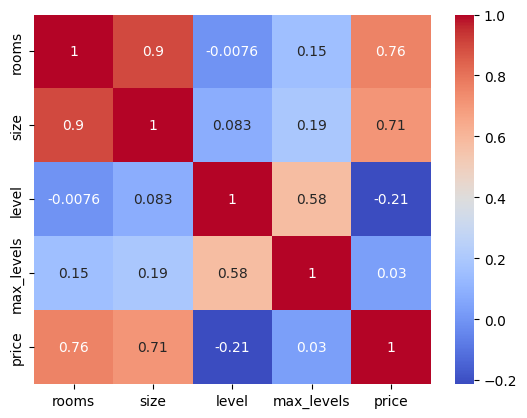

In [42]:
df_sergeli = df[df['district']=='сергелийский']
sns.heatmap(df_sergeli.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: xlabel='size', ylabel='price'>

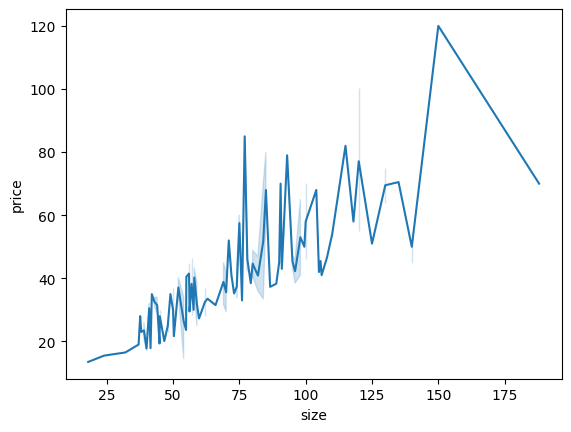

In [43]:
sns.lineplot(x='size', y='price', data=df_sergeli)

#янгихаётский

<Axes: xlabel='size', ylabel='price'>

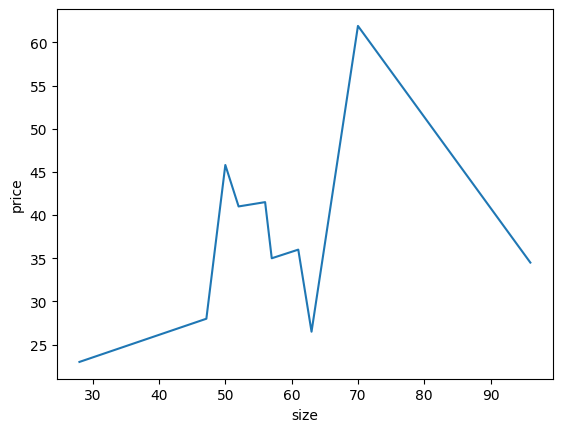

In [44]:
df_yangi = df[df['district']=='янгихаётский']
sns.lineplot(x='size', y='price', data=df_yangi)

#бектемирский

<Axes: xlabel='size', ylabel='price'>

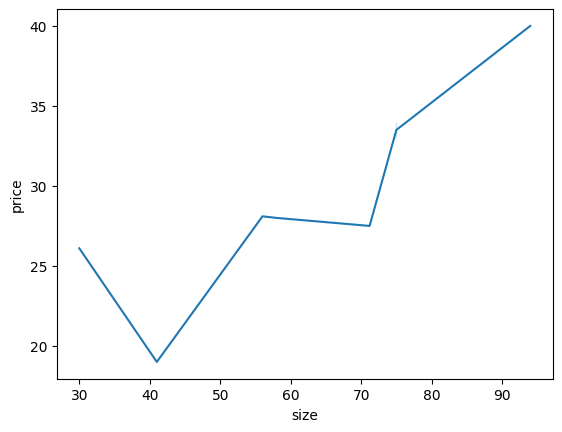

In [45]:
df_bektemir = df[df['district']=='бектемирский']
sns.lineplot(x='size', y='price', data=df_bektemir)

<Axes: xlabel='size', ylabel='price'>

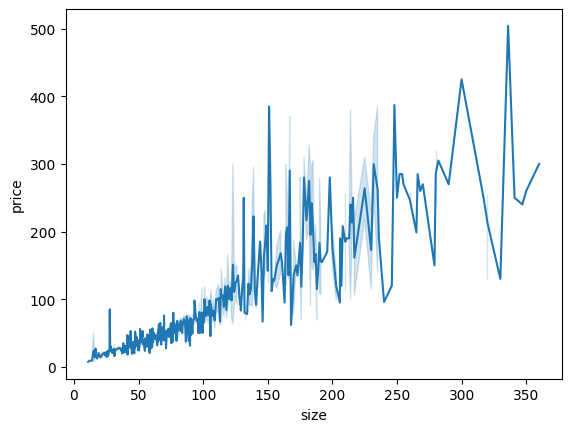

In [46]:
dfs = [df_bektemir,df_chil,df_mirobod,df_mirzo,df_olmazor, df_sergeli,df_shayx,df_yun, df_yashnaobod, df_yakkasaray,df_uchtepa,df_yangi]
new_df = pd.concat(dfs, ignore_index=True)
sns.lineplot(x='size', y='price', data=new_df)


In [47]:
new_df.to_csv('df.csv', index=False)